In [1]:
import warnings
warnings.filterwarnings('ignore')

## Imports

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import cv2
from skimage import io

In [3]:
def plot_img(img, cmap='gray'):
    plt.figure(figsize=(12,6))
    plt.imshow(img, cmap=cmap)
    plt.axis('off')
    plt.show()

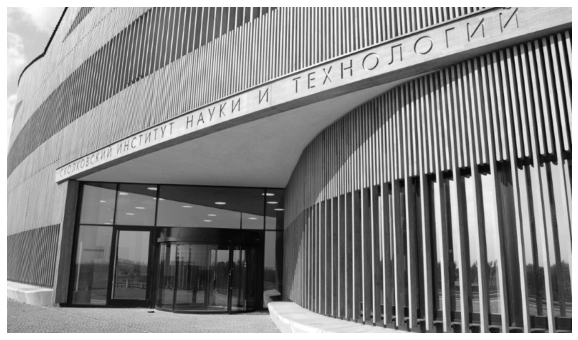

In [4]:
img_orig = np.int16(io.imread('skoltech_0.jpg'))
img = np.float32(cv2.imread('skoltech_0.jpg', 0))

plot_img(img)

Canny steps:

1. Noise reduction via Gaussian filtering
  - implement Gaussian kernel (GK)
  - convolve with GK
2. Sobel filtering
  - convolution with x-, y- gradient kernels
  - return 2 tensors: absolute values of gradient and gradient directions
3. Non-maximum suppression
4. Hysteresis thresholding

## Noise reduction via GK

In [6]:
import scipy.stats as st


def get_gk(size=17, nsig=3):
    """Returns a 2D Gaussian kernel"""

    raise NotImplementedError

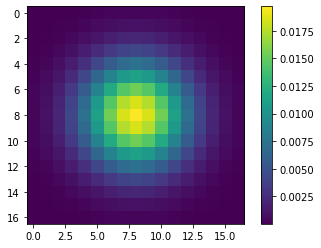

In [6]:
plt.imshow(get_gk())
plt.colorbar()
plt.show()

In [7]:
from scipy.ndimage import convolve

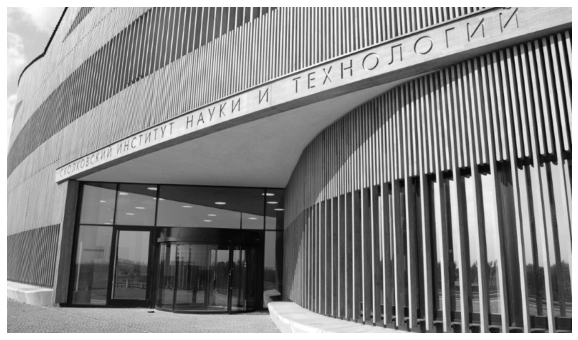

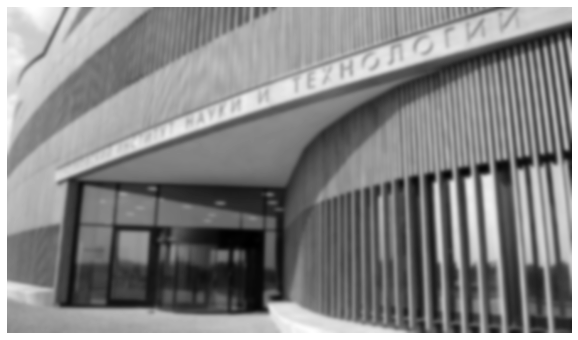

In [8]:
img_smoothed = convolve(np.float32(img), get_gk())

plot_img(img)
plot_img(img_smoothed)

## Gradient calculation via Sobel filters

In [9]:
def sobel_filters(img):
    """Applies Sobel filters to obtain gradient values and directions"""
    # from previous seminar
    
    kernel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]], dtype='float32')
    kernel_y = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]], dtype='float32')
    
    grad_x = convolve(img, kernel_x)  # approximate derivative on x
    grad_y = convolve(img, kernel_y)  # approximate derivative on y
    
    # Gradient values
    grad = np.hypot(grad_x, grad_y)  # sqrt(grad_x ** 2 + grad_y ** 2)
    grad = grad / grad.max() * 255
    # Gradient directions
    theta = np.arctan2(grad_y, grad_x)
    
    return np.float32(grad), np.float32(theta)

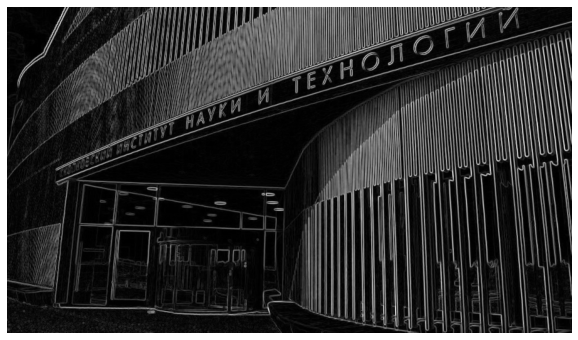

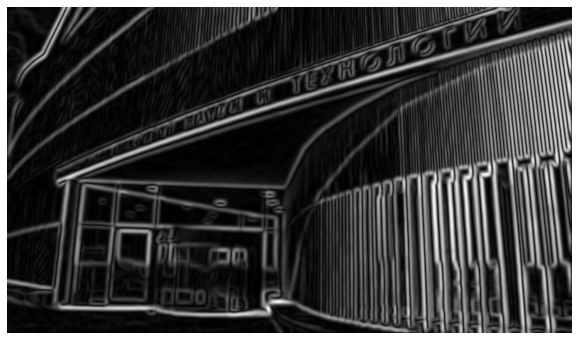

In [10]:
grad1, theta1 = sobel_filters(img)
grad, theta = sobel_filters(img_smoothed)

plot_img(grad1)
plot_img(grad)

## Non-maximum suppression

In [11]:
def non_max_suppression(grad, theta):
    # suppressed all points, that are not local maximum
    
    raise NotImplementedError

In [12]:
grad_processed = non_max_suppression(grad, theta)

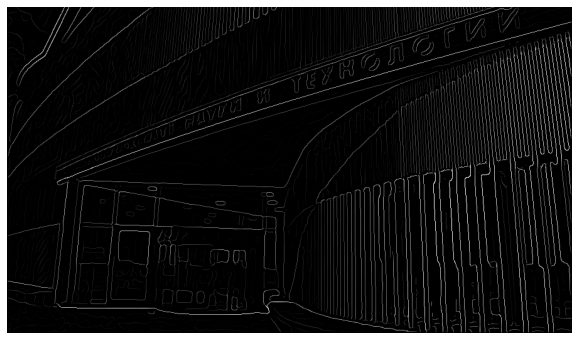

In [13]:
plot_img(grad_processed)

## Hysteresis Thresholding

In [14]:
def thresholding(img, min_val=100, max_val=200):
    # min_val <= x <= max_val :: weak value
    # max_val < x :: strong value
    # strong values should survive
    # weak values whould survive, only if they have strong neighbor
    
    raise NotImplementedError

In [15]:
grad_canny = thresholding(grad_processed, 10, 100)

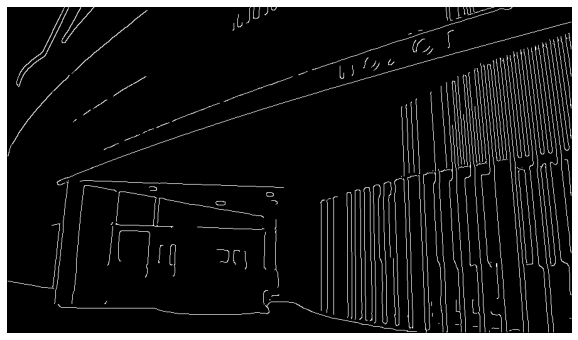

In [16]:
plot_img(grad_canny)

## Canny pipeline

In [17]:
def canny_edge_detector(img_gray, smooth_kernel_size=17, min_val=30, max_val=100):
    # 1. Smooth
    # 2. Gradients + directions
    # 3. Non-maximum suppression
    # 4. Hysteresis thresholding
    raise NotImplementedError

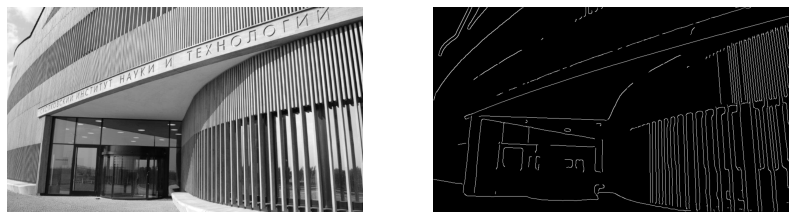

In [18]:
edges = canny_edge_detector(img, 21, 20, 90)  # some random parameters

plt.figure(figsize=(14,8))

plt.subplot('121')
plt.imshow(img, cmap='gray')
plt.axis('off')

plt.subplot('122')
plt.imshow(edges, cmap='gray')
plt.axis('off')

plt.show()

## Canny pipeline playground